In [1]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t',usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [2]:
df.shape

(2930, 6)

In [3]:
df['Central Air']=df['Central Air'].map({'N': 0, 'Y': 1})

In [4]:
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900


In [5]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [6]:
df=df.dropna(axis=0)

In [7]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

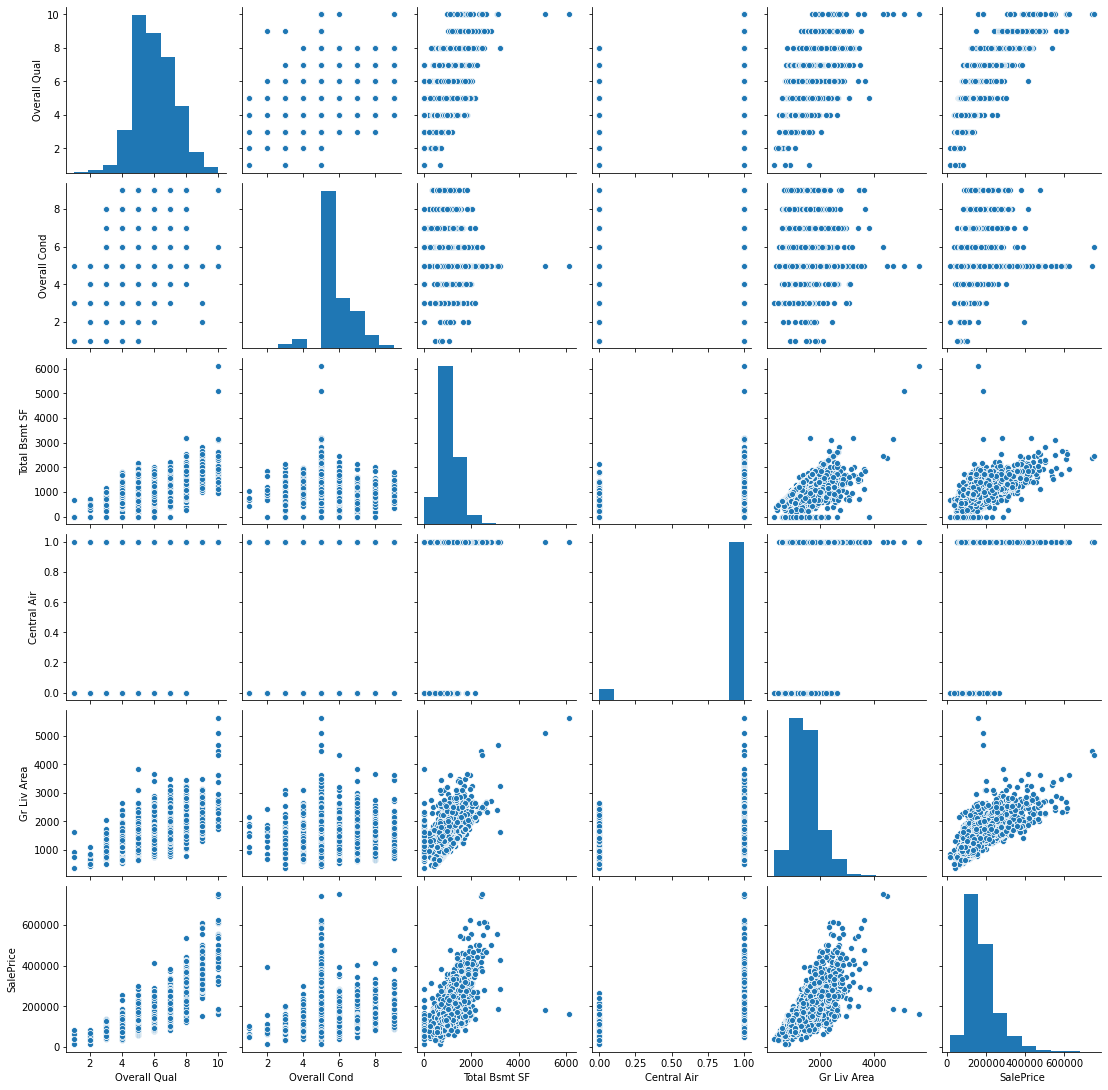

In [8]:
import seaborn as sns
sns.pairplot(df)

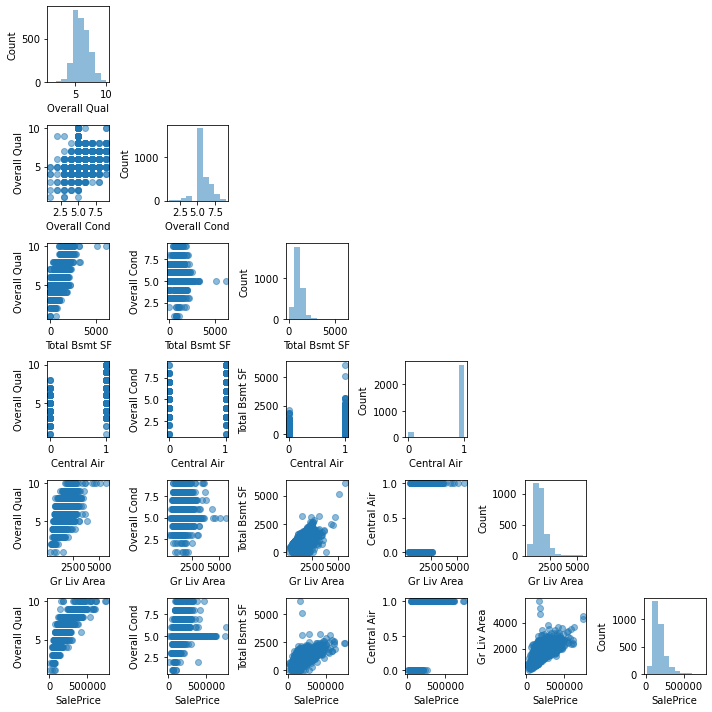

In [9]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(10, 10), 
names=df.columns, alpha=0.5)
plt.tight_layout()

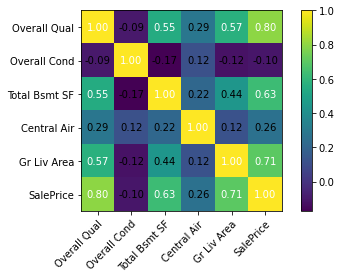

In [10]:
import numpy as np
from mlxtend.plotting import heatmap
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()

In [11]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [12]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

In [13]:
lr.losses_

[0.9773076842426139,
 0.805720477737593,
 0.6959046655743796,
 0.6256225457899232,
 0.5806419891278709,
 0.5518544328641575,
 0.533430396855381,
 0.521639013809764,
 0.514092528660569,
 0.5092627781650844,
 0.5061717378479741,
 0.5041934720450235,
 0.5029273819311352,
 0.5021170842582466,
 0.501598493747598,
 0.5012665958207829,
 0.5010541811476211,
 0.5009182357567977,
 0.5008312307066707,
 0.5007755474745894,
 0.5007399102060573,
 0.5007171023541969,
 0.5007025053290061,
 0.500693163232884,
 0.5006871842913659,
 0.5006833577687942,
 0.5006809087943485,
 0.5006793414507031,
 0.5006783383507701,
 0.500677696366813,
 0.5006772854970805,
 0.5006770225404517,
 0.5006768542482092,
 0.500676746541174,
 0.5006766776086715,
 0.5006766334918699,
 0.5006766052571169,
 0.5006765871868749,
 0.5006765756219201,
 0.500676568220349,
 0.5006765634833434,
 0.50067656045166,
 0.5006765585113825,
 0.5006765572696049,
 0.5006765564748673,
 0.5006765559662353,
 0.5006765556407107,
 0.500676555432375,
 0.5

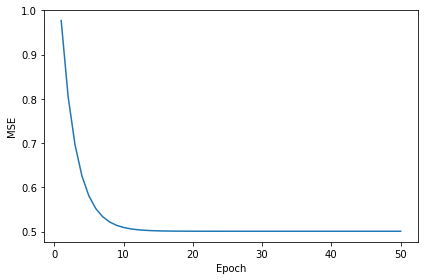

In [14]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()

Text(0, 0.5, 'Sale price (standardized)')

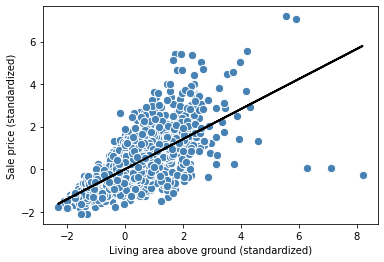

In [15]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='steelblue',edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

In [16]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')

Sale price: $292507.07


In [17]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


Slope: 111.666
Intercept: 13342.979


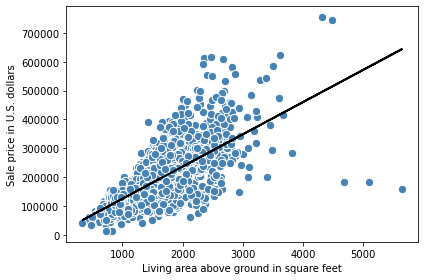

In [18]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
plt.show()